<a href="https://colab.research.google.com/github/diyamanapetty/PRODIGY_ML_01/blob/main/Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
def preprocess_data(df):
    df.fillna(df.median(numeric_only=True), inplace=True)
    return df

data = preprocess_data(data)

In [ ]:
target_variable = 'SalePrice'
numeric_features = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numeric_features].corr()

In [ ]:
correlated_features = correlation_matrix[target_variable].abs().sort_values(ascending=False).head(11).index

In [ ]:
print("Top 10 features correlated with SalePrice:")
print(correlated_features)

Top 10 features correlated with SalePrice:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


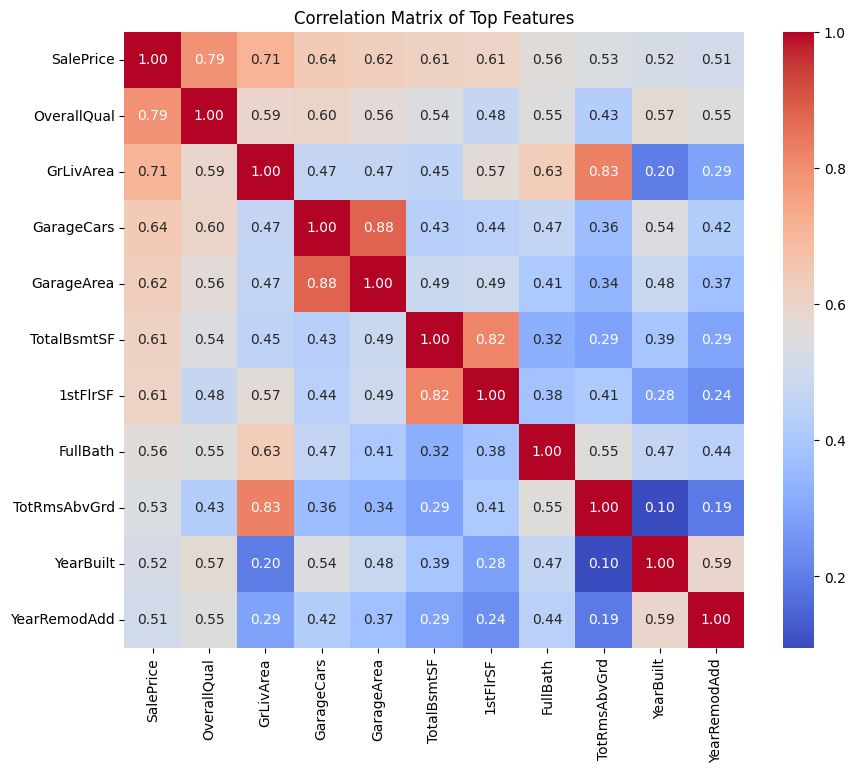

In [ ]:
top_correlation_matrix = correlation_matrix.loc[correlated_features, correlated_features]
plt.figure(figsize=(10, 8))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top Features")
plt.show()

In [ ]:
selected_features = correlated_features.drop(target_variable).tolist()
X = data[selected_features]
y = data[target_variable]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("R-squared:", r2)

R-squared: 0.7968483304281094


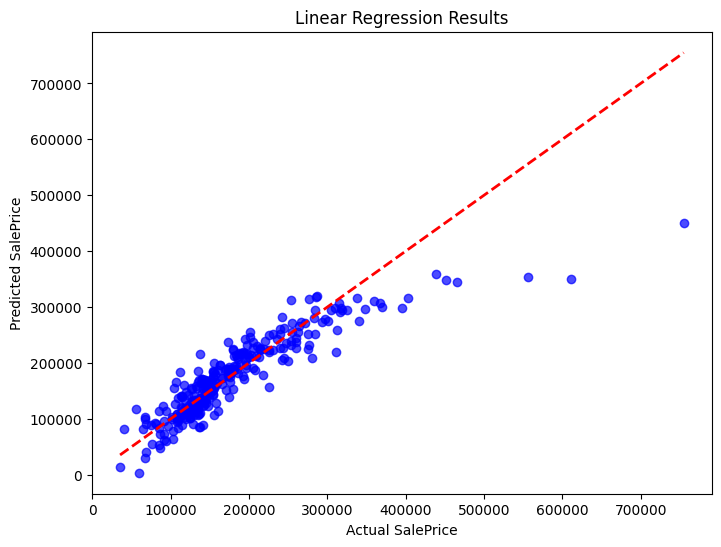

In [ ]:
# Plot the linear regression results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Linear Regression Results")
plt.show()